## Punto 3

In [1]:
#Needen imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.signal import convolve2d
from matplotlib.colors import LogNorm

In [9]:
#Import the picture 
arboles = plt.imread("Arboles.png").astype(float)
#Fourier transform of the image
hojas = fftpack.fft2(arboles,axes=(0,1))

c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


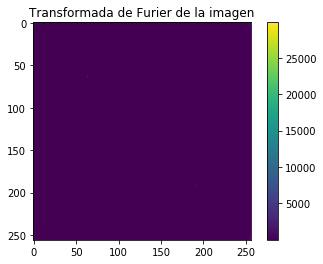

In [11]:
#Color map of the transform 
plt.figure()
plt.imshow(np.abs(hojas))
plt.colorbar()
plt.title("Transformada de Furier de la imagen")
plt.savefig("MartinezDiego_FT2D.pdf",type = "pdf")

In [14]:
#filter to delete the periodic noise 
frac = 0.083
r,c = hojas.shape
ramas = hojas.copy()
#delete the fraction of the coefficients
ramas[int(r*frac):int(r*(1-frac))] = 0
ramas[:, int(c*frac):int(c*(1-frac))] = 0

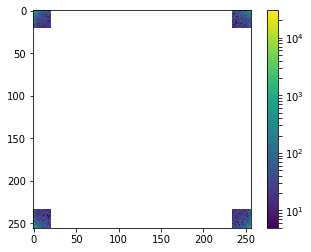

In [19]:
#Plot of the fourier transform without noise 
plt.figure()
plt.imshow(np.abs(ramas), norm=LogNorm(vmin=5))
plt.colorbar()
plt.savefig("MartinezDiego_FT2D_filtrada.pdf",type = "pdf")

c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


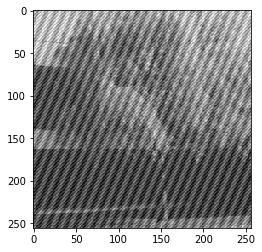

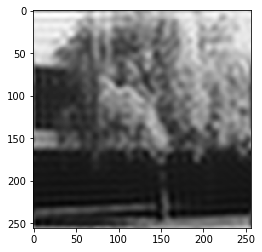

In [22]:
#reconstruction of the transform with the filter
#Original
plt.figure()
plt.imshow(arboles, plt.cm.gray)

#Reconstruction
arbolito = fftpack.ifft2(ramas).real
plt.figure()
plt.imshow(arbolito, plt.cm.gray)
plt.savefig("MartinezDiego_Imagen_filtrada.pdf",type = "pdf")